In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)
Path.BASE_PATH = path
path.ls()

(#2) [Path('annotations'),Path('images')]

In [2]:
(path/"images").ls()

(#7393) [Path('images/havanese_48.jpg'),Path('images/wheaten_terrier_162.jpg'),Path('images/scottish_terrier_158.jpg'),Path('images/Bengal_145.jpg'),Path('images/havanese_151.jpg'),Path('images/saint_bernard_127.jpg'),Path('images/Bombay_96.jpg'),Path('images/British_Shorthair_127.jpg'),Path('images/Persian_72.jpg'),Path('images/keeshond_119.jpg')...]

In [3]:
re.findall(r'(.+)_\d+.jpg$', (path/"images").ls()[0].name)

['havanese']

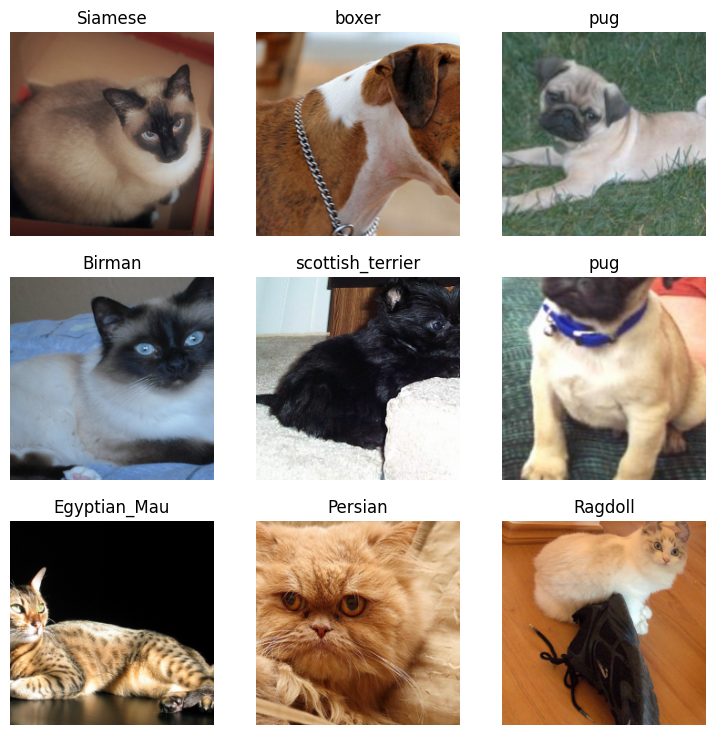

In [4]:
pets = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(),
    get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), "name"),
    item_tfms = Resize(460),
    batch_tfms = aug_transforms(size=224, min_scale=0.75)
)
dls = pets.dataloaders(path/"images")
dls.show_batch()

In [5]:
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/american_bulldog_137.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/american_bulldog_137.jpg
    applying partial gives
      american_bulldog
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(12)

Final sample: (PILImage mode=RGB size=500x333, TensorCategory(12))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
S

In [6]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 58.9MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.507748,0.364287,0.117727,01:38


epoch,train_loss,valid_loss,error_rate,time
0,0.548957,0.323737,0.098782,01:36
1,0.312408,0.246879,0.073072,01:13


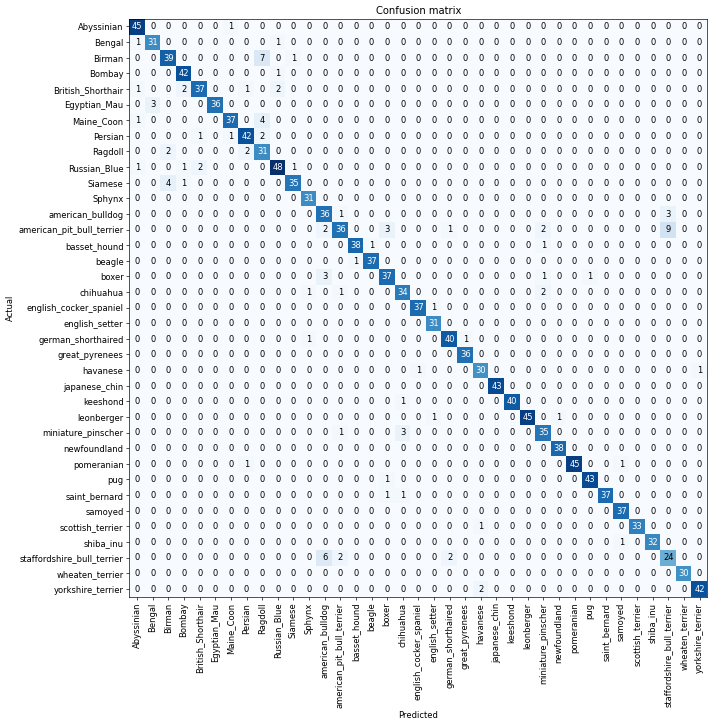

In [11]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [8]:
interpret.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 9),
 ('Birman', 'Ragdoll', 7),
 ('staffordshire_bull_terrier', 'american_bulldog', 6)]

In [18]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.561108,7.464237,0.583897,01:08


epoch,train_loss,valid_loss,error_rate,time
0,4.128890,2.994195,0.800406,01:11
1,2.159225,1.812887,0.370771,01:15


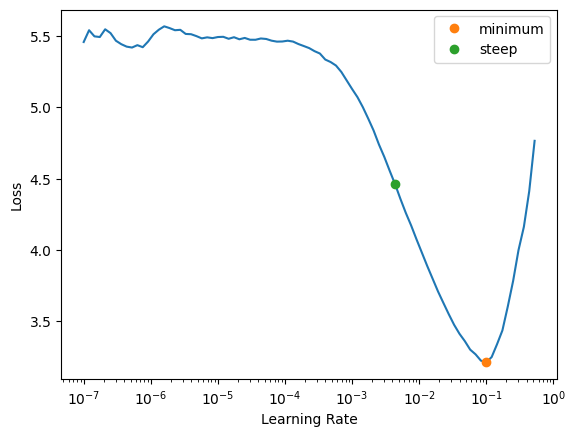

In [20]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [21]:
print(f"{lr_min:.2e}", f"{lr_steep:.2e}")

1.00e-02 4.37e-03


In [22]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=2e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.495880,0.350234,0.119756,01:17


epoch,train_loss,valid_loss,error_rate,time
0,0.509892,0.335880,0.100135,01:21
1,0.323514,0.260861,0.079838,01:21


In [23]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 2e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.307216,0.334283,0.104871,01:11
1,0.544970,0.280620,0.079838,01:10
2,0.334016,0.236574,0.071719,01:09


In [24]:
learn.unfreeze()

SuggestedLRs(valley=3.630780702224001e-05)

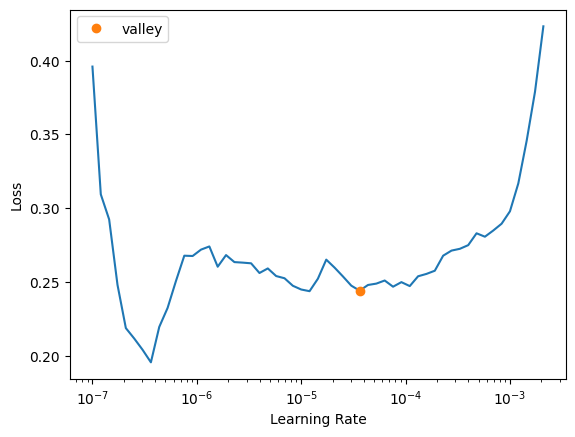

In [25]:
learn.lr_find()

In [26]:
learn.fit_one_cycle(6, 3.6e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.273030,0.236273,0.074425,01:17
1,0.260372,0.233731,0.071719,01:11
2,0.226042,0.246906,0.078484,01:13
3,0.176070,0.214993,0.069012,01:13
4,0.142340,0.220359,0.068336,01:11
5,0.125268,0.213567,0.065629,01:13


In [27]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 2e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.295602,0.379427,0.118403,01:09
1,0.539159,0.265729,0.087957,01:10
2,0.338919,0.248363,0.076455,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.294207,0.238545,0.073072,01:12
1,0.255573,0.243906,0.076455,01:12
2,0.235383,0.218578,0.062246,01:13
3,0.218219,0.237035,0.066306,01:12
4,0.181034,0.233184,0.064953,01:12
5,0.141121,0.214732,0.060217,01:13
6,0.116703,0.228217,0.064276,01:12
7,0.099686,0.231635,0.060893,01:11
8,0.085398,0.225062,0.060893,01:14
9,0.082814,0.220011,0.062246,01:13


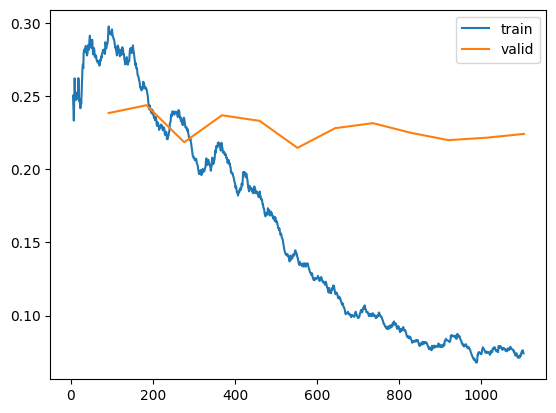

In [28]:
learn.recorder.plot_loss()